## MACHINE LEARNING DAY-3 : Multiple Linear Regression

### Assumptions for Linear Regression :
**`1.Linearity`** : Linear relationship between Y and X.<br>
**`2.Homoscedasticity`** : Equal Variance.<br>
**`3.Multivariate Normality`** : Normality of error distribution.<br>
**`4.Independence`** : Independence of observations. Includes "no autocorrelation".<br>
**`5.Lack of Multicollinearity`** : Predictors are not correlated with each other.<br>
**`6.The Outlier Check`** : This is not an assumption, but "extra".<br><br>
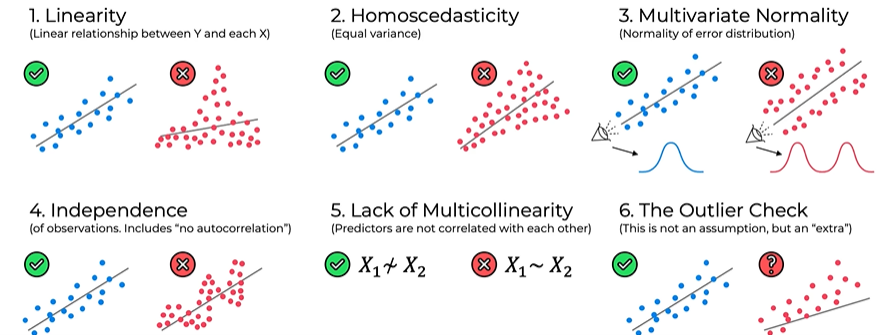

### Building a Model

#### 1. All-in (Enter Method)

**What we do:**

Include all predictors in the model without removing any.

**Steps:**

1. Identify all the independent variables (X1, X2, ..., Xn).
2. Fit the model using all of them at once.

   ```python
   model = sm.OLS(y, X).fit()
   ```

**Use when:**

* You are confident all variables are relevant.
* You have domain knowledge or a small number of predictors.

**Caution:**

* Risk of overfitting.
* May include irrelevant or insignificant variables.

---

#### 2. Backward Elimination

**What we do:**

Start with all predictors, and remove the least significant (highest p-value) one by one.

**Steps:**

1. Fit the model with all predictors.
2. Check p-values of all predictors.
3. Remove the predictor with the highest p-value greater than the significance level (e.g., 0.05).
4. Refit the model with remaining predictors.
5. Repeat steps 2–4 until all p-values are below the chosen significance level.

**Use when:**

* You have a large set of variables.
* You want to reduce model complexity.

---

#### 3. Forward Selection

**What we do:**

Start with no variables, and add one variable at a time that improves the model the most (based on lowest p-value or highest adjusted R²).

**Steps:**

1. Start with an empty model.
2. For each variable, fit a model using only that variable.
3. Choose the variable with the lowest p-value below the significance level or the highest adjusted R².
4. Add that variable to the model.
5. Repeat steps 2–4 for remaining variables.
6. Stop when no variable improves the model significantly.

**Use when:**

* You have a large number of predictors.
* You want to build the model from scratch in a controlled way.

---

#### 4. Bidirectional Elimination (Stepwise Selection)

**What we do:**

A combination of forward selection and backward elimination. At each step, you can add or remove variables based on significance.

**Steps:**

1. Start with an empty model or a base model.
2. Use forward selection to add variables.
3. After each addition, check if any existing variable has become insignificant, and remove it.
4. Repeat steps 2–3 until no new variables can be added and no existing variables need to be removed.

**Use when:**

* You want the best balance between forward and backward strategies.
* Model performance and simplicity are both important.

---

#### 5. Score Comparison / Best Subset Selection

**What we do:**

Try all possible combinations of predictors and choose the best one based on a scoring metric such as adjusted R², AIC, BIC, or RMSE.

**Steps:**

1. Generate all possible subsets of predictors.
2. For each subset, fit a model and compute performance metrics.
3. Choose the subset with the best score (e.g., highest adjusted R² or lowest AIC/BIC).

**Use when:**

* You have a small number of variables (since combinations grow exponentially).
* You want the most accurate model regardless of computation cost.

### Importing the libraries

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the dataset

In [8]:
df = pd.read_csv('../datasets/50_Startups.csv')
print(df.head())

   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94


In [9]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
print(X)
print('\n')
print(y)

[[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [142107.34 91391.77 366168.42 'Florida']
 [131876.9 99814.71 362861.36 'New York']
 [134615.46 147198.87 127716.82 'California']
 [130298.13 145530.06 323876.68 'Florida']
 [120542.52 148718.95 311613.29 'New York']
 [123334.88 108679.17 304981.62 'California']
 [101913.08 110594.11 229160.95 'Florida']
 [100671.96 91790.61 249744.55 'California']
 [93863.75 127320.38 249839.44 'Florida']
 [91992.39 135495.07 252664.93 'California']
 [119943.24 156547.42 256512.92 'Florida']
 [114523.61 122616.84 261776.23 'New York']
 [78013.11 121597.55 264346.06 'California']
 [94657.16 145077.58 282574.31 'New York']
 [91749.16 114175.79 294919.57 'Florida']
 [86419.7 153514.11 0.0 'New York']
 [76253.86 113867.3 298664.47 'California']
 [78389.47 153773.43 299737.29 'New York']
 [73994.56 122782.75 303319.26 'Florida']
 [67532

### Encoding the categorical data

In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
print(X)

[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [1.0 0.0 0.0 134615.46 147198.87 127716.82]
 [0.0 1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 123334.88 108679.17 304981.62]
 [0.0 1.0 0.0 101913.08 110594.11 229160.95]
 [1.0 0.0 0.0 100671.96 91790.61 249744.55]
 [0.0 1.0 0.0 93863.75 127320.38 249839.44]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [0.0 1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 0.0 1.0 86419.7 153514.11 0.0]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 1.0 78389.47 153773.43 299737.29]
 [0.0 1.0 0.0 73994.56 122782.75 3

### Splitting the dataset into the Training set and Test set

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train)
print('\n')
print(X_test)
print('\n')
print(y_train)
print('\n')
print(y_test)

[[0.0 1.0 0.0 55493.95 103057.49 214634.81]
 [0.0 0.0 1.0 46014.02 85047.44 205517.64]
 [0.0 1.0 0.0 75328.87 144135.98 134050.07]
 [1.0 0.0 0.0 46426.07 157693.92 210797.67]
 [0.0 1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 0.0 1.0 1000.23 124153.04 1903.93]
 [0.0 0.0 1.0 542.05 51743.15 0.0]
 [0.0 0.0 1.0 65605.48 153032.06 107138.38]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [0.0 1.0 0.0 61994.48 115641.28 91131.24]
 [1.0 0.0 0.0 63408.86 129219.61 46085.25]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [1.0 0.0 0.0 23640.93 96189.63 148001.11]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 1.0 15505.73 127382.3 35534.17]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [1.0 0.0 0.0 64664.71 139553.16 137962.62]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [1.0 0.0 0.0 28754.33 118546.05 172795.67]
 [1.

### Training the Multi linear regression model on the Training set

In [15]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

### Predicting the Test set results

In [17]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision = 2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_pred),1)), 1))

[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]


### Evaluating the performance metrics

In [19]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print('R2 Score : ',r2_score(y_test, y_pred))
print('MAE Score : ',mean_absolute_error(y_test, y_pred))
print('MSE Score : ',mean_squared_error(y_test, y_pred))
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE : ", rmse)

R2 Score :  0.9347068473282303
MAE Score :  7514.2936596413765
MSE Score :  83502864.03259295
RMSE :  9137.990152795797
